In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0] ])

In [40]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

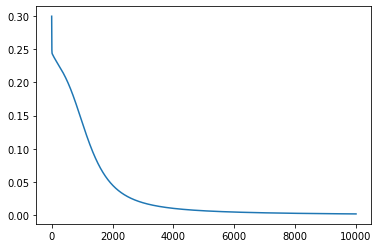

In [41]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [42]:
print(NN.feedForward([0,0]))

[0.05285688]


In [43]:

print(NN.feedForward([1,1]))

[0.04283578]


In [44]:
print(NN.feedForward([1,0]))


[0.95335457]


In [45]:
print(NN.feedForward([0,1]))

[0.95587195]
